In [51]:
# Modules to import
import argparse
import numpy as np
import pandas as pd
from openmm.unit import *

kT = 298 * kelvin * BOLTZMANN_CONSTANT_kB * AVOGADRO_CONSTANT_NA
kT = kT.in_units_of(kilocalories_per_mole)


def jacobian(dgs, errs, kT=kT):
    dgs = np.asarray(dgs)
    delta_dgs = np.asarray(errs)
    beta = 1 / kT

    exp_factors = np.exp(-beta * dgs)  
    sumup = np.sum(exp_factors)  # partition factor
    w = exp_factors / sumup  # weights

    dg_all = (-1 / beta) * np.log(sumup)

    # Error propagation for the sum of Boltzmann factors
    sigma_G = np.sqrt(np.sum((w**2) * (delta_dgs**2)))
    sigma_G_ = np.sqrt( np.sum( ((w * delta_dgs) / sumup)**2) )

    print(sigma_G, sigma_G_)
    return [dg_all._value, sigma_G]

In [38]:
complex = pd.read_csv(
    "/home/will/data_6/LIG_GCNCMC_PAPER/REVIEW_ANALYSIS/fep/ComplexFEs.txt"
)
solv = pd.read_csv("/home/will/data_6/LIG_GCNCMC_PAPER/REVIEW_ANALYSIS/fep/Solv.txt")
solv.rename(columns={"Mu_Ex": "Solv", "Mu_Ex_err": "Solv_err"}, inplace=True)

reston = pd.read_csv("/home/will/data_6/LIG_GCNCMC_PAPER/REVIEW_ANALYSIS/fep/Rest_on.txt")
restoff = pd.read_csv("/home/will/data_6/LIG_GCNCMC_PAPER/REVIEW_ANALYSIS/fep/Restraint_off.txt")
ligands = pd.read_csv("/home/will/data_6/LIG_GCNCMC_PAPER/REVIEW_ANALYSIS/fep/unique_ligs.txt")
sym_number = pd.read_csv("/home/will/data_6/LIG_GCNCMC_PAPER/REVIEW_ANALYSIS/fep/sym_nums.txt")

sym_number["sym_corr"] = -kT._value * np.log(sym_number["sym"])

ligands = complex["Ligand"]

unique_ligands = pd.read_csv(
    "/home/will/data_6/LIG_GCNCMC_PAPER/REVIEW_ANALYSIS/fep/unique_ligs.txt"
)
unique_ligands = unique_ligands[["Ligand"]]
unique_ligands.rename(columns={"Ligand": "Name"}, inplace=True)


all_data = complex.merge(solv).merge(reston).merge(restoff).merge(sym_number)


all_data["dG"] = (
    -all_data["Solv"]
    - all_data["Rest_off"]
    + all_data["Complex"]
    - all_data["Restraints"]
)
all_data["dG_err"] = np.sqrt(all_data["Complex_err"] ** 2 + all_data["Solv_err"] ** 2 + all_data["Restraints_err"] ** 2,
)


# all_data["dG_plus"] = -all_data["Solv_plus"] - all_data["Rest_off"] +  all_data["Complex_plus"] - all_data["Restraints_plus"]
# all_data["dG_minus"] = -all_data["Solv_minus"] - all_data["Rest_off"] +  all_data["Complex_minus"] - all_data["Restraints_minus"]

all_data["dG_sym"] = all_data["dG"] + all_data["sym_corr"]

# all_data["dG_sym_plus"] = -all_data["Solv_plus"] - all_data["Rest_off"] +  all_data["Complex_plus"] - all_data["Restraints_plus"] + all_data["sym_corr"]
# all_data["dG_sym_minus"] = -all_data["Solv_minus"] - all_data["Rest_off"] +  all_data["Complex_minus"] - all_data["Restraints_minus"] + all_data["sym_corr"]

# all_data["dG_err"] = abs(all_data["dG"] - all_data["dG_plus"]) / 2


# jacos = [
#     jacobian(
#         all_data[all_data["Ligand"].str.contains(i, regex=False)]["dG"].tolist(),
#         all_data[all_data["Ligand"].str.contains(i, regex=False)]["dG_err"].tolist(),
#     )
#     for i in unique_ligands["Name"]
# ]

# jacos_sym = [
#     jacobian(
#         all_data[all_data["Ligand"].str.contains(i, regex=False)]["dG_sym"].tolist(),
#         all_data[all_data["Ligand"].str.contains(i, regex=False)]["dG_err"].tolist(),
#     )
#     for i in unique_ligands["Name"]
# ]

# most_fav = [
#     np.min(all_data[all_data["Ligand"].str.contains(i, regex=False)]["dG"].tolist())
#     for i in unique_ligands["Name"]
# ]
# most_fav_ids = [
#     np.argmin(all_data[all_data["Ligand"].str.contains(i, regex=False)]["dG"].tolist())
#     for i in unique_ligands["Name"]
# ]
# most_fav_err = [
#     all_data[all_data["Ligand"].str.contains(i, regex=False)]["dG_err"].tolist()[
#         most_fav_ids[j]
#     ]
#     for j, i in enumerate(unique_ligands["Name"])
# ]

In [39]:
all_data

,Ligand,Complex,Complex_err,Solv,Solv_err,Restraints,Restraints_err,Rest_off,sym,sym_corr,dG,dG_err,dG_sym
0,Benzene,-8.797128,0.142544,-0.513034,0.025307,2.480693,0.077934,-6.707734,12,-1.471529,-4.057052,0.164417,-5.528581
1,Benzofuran_0,-9.874091,0.336556,-3.120105,0.021709,3.571675,0.113858,-6.937336,1,-0.000000,-3.388324,0.355956,-3.388324
2,Benzofuran_1,-6.866114,0.255653,-3.120105,0.021709,4.316765,0.278692,-7.325370,1,-0.000000,-0.737403,0.378812,-0.737403
3,Benzofuran_4,-11.165145,0.199312,-3.120105,0.021709,2.882934,0.003812,-6.933015,1,-0.000000,-3.994959,0.200527,-3.994959
4,Ethylbenzene,-9.048414,0.311176,-0.202998,0.027343,3.671868,0.056256,-6.768818,1,-0.000000,-5.748466,0.317400,-5.748466
5,Indene_0,-7.840788,0.466695,-2.097266,0.016247,5.088202,0.186517,-6.859235,1,-0.000000,-3.972489,0.502849,-3.972489
6,Indene_1,-9.231111,0.308384,-2.097266,0.016247,3.668854,0.055549,-6.951997,1,-0.000000,-3.850702,0.313768,-3.850702
7,Indene_2,-6.565439,0.057836,-2.097266,0.016247,6.183231,0.136576,-6.976621,1,-0.000000,-3.674782,0.149204,-3.674782
8,Indene_3,-4.833628,0.104863,-2.097266,0.016247,6.979807,0.163579,-6.842389,1,-0.000000,-2.873780,0.194983,-2.873780
9,Indole_2,-11.894107,0.391852,-6.129326,0.015182,3.590103,0.036014,-6.878614,1,-0.000000,-2.476270,0.393796,-2.476270


In [40]:
all_data["Ligand_stripped"] = all_data["Ligand"].str.split('_').str[0]

In [41]:
all_data[['Ligand', 'Ligand_stripped']]

,Ligand,Ligand_stripped
0,Benzene,Benzene
1,Benzofuran_0,Benzofuran
2,Benzofuran_1,Benzofuran
3,Benzofuran_4,Benzofuran
4,Ethylbenzene,Ethylbenzene
5,Indene_0,Indene
6,Indene_1,Indene
7,Indene_2,Indene
8,Indene_3,Indene
9,Indole_2,Indole


In [42]:
all_data[all_data["Ligand_stripped"] == 'Benzene']

,Ligand,Complex,Complex_err,Solv,Solv_err,Restraints,Restraints_err,Rest_off,sym,sym_corr,dG,dG_err,dG_sym,Ligand_stripped
0,Benzene,-8.797128,0.142544,-0.513034,0.025307,2.480693,0.077934,-6.707734,12,-1.471529,-4.057052,0.164417,-5.528581,Benzene


In [52]:
jacos_sym = [
    jacobian(
        all_data[all_data["Ligand_stripped"] == i][
            "dG_sym"
        ].tolist(),
        all_data[all_data["Ligand_stripped"] == i][
            "dG_err"
        ].tolist(),
    )
    for i in unique_ligands["Name"]
]

most_fav = [
    np.min(all_data[all_data["Ligand_stripped"] == i]["dG_sym"].tolist())
    for i in unique_ligands["Name"]
]
most_fav_ids = [
    np.argmin(all_data[all_data["Ligand_stripped"] == i]["dG_sym"].tolist())
    for i in unique_ligands["Name"]
]
most_fav_err = [
    all_data[all_data["Ligand_stripped"] == i]["dG_err"].tolist()[most_fav_ids[j]]
    for j, i in enumerate(unique_ligands["Name"])
]

0.16441667095514867 1.45019925232045e-05
0.17444918316354913 0.00015043312787088302
0.22210169684465117 0.00010529021178386971
0.3594546827174917 0.005010368949924632
0.14943329654538715 8.486569081538501e-05
0.317399736780944 1.9312143037700314e-05
0.24362374462296266 0.0001952045567640371
0.11397710031918132 4.346576680997326e-05
0.25134563770755286 0.015559488237558879
0.16537654929142068 1.9642798852612176e-05
0.20496640951284453 5.815155926498704e-05
1.031261295405298 2.3502052834793336e-06
0.2199118780292215 1.1027361536496524e-05
0.14815433487272256 0.00011363242036202175
0.4155035905167184 0.0017899244919466072
0.03906848358113249 6.030304767170455e-07
0.11482776331856431 0.0008662248085742841
0.2393266903257967 0.0005620367704655669
0.5629974494812856 7.792099232497036e-05
0.30861958220678104 1.220212097732081e-06


In [48]:
# jacos_max = [jacobian(all_data[all_data['Ligand'].str.contains(i)]['dG_plus'].tolist()) for i in unique_ligands["Name"]]
# jacos_min = [jacobian(all_data[all_data['Ligand'].str.contains(i)]['dG_minus'].tolist()) for i in unique_ligands["Name"]]
jacos_sym = np.asarray(jacos_sym)


unique_ligands["final_dG_sym"] = jacos_sym[:, 0]
unique_ligands["final_err"] = jacos_sym[:, 1]


unique_ligands["most_fav"] = most_fav
unique_ligands["most_fav_err"] = most_fav_err



In [50]:
unique_ligands

,Name,final_dG_sym,final_err,most_fav,most_fav_err
0,Benzene,-5.528581,0.164417,-5.528581,0.164417
1,Benzofuran,-4.178394,0.174449,-3.994959,0.200527
2,Indene,-4.532699,0.222102,-3.972489,0.502849
3,Indole,-2.530461,0.359455,-2.476270,0.393796
4,Toluene,-4.425730,0.149433,-4.193514,0.181428
5,Ethylbenzene,-5.748466,0.317400,-5.748466,0.317400
6,m-xylene,-4.221897,0.243624,-4.031304,0.301419
7,o-xylene,-4.661564,0.113977,-4.311027,0.141137
8,Phenol,-1.647558,0.251346,-1.647558,0.251346
9,Propylbenzene,-5.352344,0.165377,-5.352344,0.165377


In [53]:
all_data

,Ligand,Complex,Complex_err,Solv,Solv_err,Restraints,Restraints_err,Rest_off,sym,sym_corr,dG,dG_err,dG_sym,Ligand_stripped
0,Benzene,-8.797128,0.142544,-0.513034,0.025307,2.480693,0.077934,-6.707734,12,-1.471529,-4.057052,0.164417,-5.528581,Benzene
1,Benzofuran_0,-9.874091,0.336556,-3.120105,0.021709,3.571675,0.113858,-6.937336,1,-0.000000,-3.388324,0.355956,-3.388324,Benzofuran
2,Benzofuran_1,-6.866114,0.255653,-3.120105,0.021709,4.316765,0.278692,-7.325370,1,-0.000000,-0.737403,0.378812,-0.737403,Benzofuran
3,Benzofuran_4,-11.165145,0.199312,-3.120105,0.021709,2.882934,0.003812,-6.933015,1,-0.000000,-3.994959,0.200527,-3.994959,Benzofuran
4,Ethylbenzene,-9.048414,0.311176,-0.202998,0.027343,3.671868,0.056256,-6.768818,1,-0.000000,-5.748466,0.317400,-5.748466,Ethylbenzene
5,Indene_0,-7.840788,0.466695,-2.097266,0.016247,5.088202,0.186517,-6.859235,1,-0.000000,-3.972489,0.502849,-3.972489,Indene
6,Indene_1,-9.231111,0.308384,-2.097266,0.016247,3.668854,0.055549,-6.951997,1,-0.000000,-3.850702,0.313768,-3.850702,Indene
7,Indene_2,-6.565439,0.057836,-2.097266,0.016247,6.183231,0.136576,-6.976621,1,-0.000000,-3.674782,0.149204,-3.674782,Indene
8,Indene_3,-4.833628,0.104863,-2.097266,0.016247,6.979807,0.163579,-6.842389,1,-0.000000,-2.873780,0.194983,-2.873780,Indene
9,Indole_2,-11.894107,0.391852,-6.129326,0.015182,3.590103,0.036014,-6.878614,1,-0.000000,-2.476270,0.393796,-2.476270,Indole


In [ ]:
unique_ligands.to_csv(
    "final_FEP.txt",
    sep="\t",
    columns=["final_dG", "final_err", "Name"],
    header=False,
    index=False,
)
unique_ligands.to_csv(
    "final_FEP_sym.txt",
    columns=["final_dG_sym", "final_err", "Name"],
    sep="\t",
    header=False,
    index=False,
)
unique_ligands.to_csv(
    "final_FEP_mostfav.txt",
    columns=["most_fav", "most_fav_err", "Name"],
    sep="\t",
    header=False,
    index=False,
)

# Symmetry cycle closures

Here we're going to make as many cycles as possible with 3 ligands of different symmetries and calculate the cycle closure errors from FEP, FEP with sym and Titration

In [283]:
unique_ligands

,Name,final_dG,final_err
0,Benzene,-4.057052,0.066368
1,Benzofuran,-4.178394,0.233119
2,Indene,-4.532699,0.217662
3,Indole,-2.530461,0.524968
4,Toluene,-4.015257,0.138022
5,Ethylbenzene,-5.748466,0.384298
6,m-xylene,-3.811424,0.283144
7,o-xylene,-4.251092,0.025877
8,Phenol,-1.237085,0.245853
9,Propylbenzene,-3.241267,0.282072


In [284]:
unique_ligands["sym"] = [12, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1]

In [286]:
diff_syms = unique_ligands["sym"].unique()

In [290]:
sym_1 = unique_ligands[unique_ligands["sym"] == 1]["Name"].tolist()
sym_2 = unique_ligands[unique_ligands["sym"] == 2]["Name"].tolist()
sym_12 = unique_ligands[unique_ligands["sym"] == 12]["Name"].tolist()


In [292]:
import itertools

In [293]:
combinations = list(itertools.product(sym_1, sym_2, sym_12))

In [295]:
len(combinations)

24

In [310]:
dgs


[-4.057052375794704, -1.237085017023408, -4.836715090019364]

In [325]:
1.527 + 1.2929 - 2.82

-0.00010000000000021103

In [327]:
dgs

[10   -4.836715
 Name: final_dG, dtype: float64,
 8   -1.237085
 Name: final_dG, dtype: float64,
 0   -4.057052
 Name: final_dG, dtype: float64]

In [330]:
_ = unique_ligands[unique_ligands["Name"] == l].final_dG

In [337]:
_

-4.178393630160509

In [367]:
cc = []
cc_sym = []
print("Combination                                 dgs                                                 cycle")
for comb in combinations:
    dgs = []
    for l in comb:
        dgs.append(unique_ligands[unique_ligands["Name"] == l].final_dG.iloc[0])
    
    cc.append((dgs[1] - dgs[0]) + (dgs[2] - dgs[1]) + (dgs[0] - dgs[2]))
    print(comb, dgs, (dgs[1] - dgs[0]) + (dgs[2] - dgs[1]) + (dgs[0] - dgs[2]))

Combination                                 dgs                                                 cycle
('Benzofuran', 'Toluene', 'Benzene') [-4.178393630160509, -4.015256927954914, -4.057052375794704] 0.0
('Benzofuran', 'm-xylene', 'Benzene') [-4.178393630160509, -3.8114242945957626, -4.057052375794704] 0.0
('Benzofuran', 'o-xylene', 'Benzene') [-4.178393630160509, -4.251091604685329, -4.057052375794704] 0.0
('Benzofuran', 'Phenol', 'Benzene') [-4.178393630160509, -1.237085017023408, -4.057052375794704] 0.0
('Indene', 'Toluene', 'Benzene') [-4.532699080512173, -4.015256927954914, -4.057052375794704] 0.0
('Indene', 'm-xylene', 'Benzene') [-4.532699080512173, -3.8114242945957626, -4.057052375794704] 0.0
('Indene', 'o-xylene', 'Benzene') [-4.532699080512173, -4.251091604685329, -4.057052375794704] 0.0
('Indene', 'Phenol', 'Benzene') [-4.532699080512173, -1.237085017023408, -4.057052375794704] 0.0
('Indole', 'Toluene', 'Benzene') [-2.530461012402761, -4.015256927954914, -4.057052375794704] 

In [391]:
dgs = [-4.057, -1.24, -2.873]

In [392]:
dgs[1] - dgs[0]

2.817

In [393]:
dgs[1] - dgs[2]

1.6330000000000002

In [394]:
dgs[0] - dgs[2]

-1.1840000000000002

In [395]:
(dgs[1] - dgs[0]) + (dgs[2] - dgs[1]) + (dgs[0] - dgs[2])

-2.220446049250313e-16

In [364]:
-4.17 - -4.057

-0.11299999999999955

In [363]:
-4.057--4.17

0.11299999999999955

In [319]:
unique_ligands

,Name,final_dG,final_err,sym
0,Benzene,-4.057052,0.066368,12
1,Benzofuran,-4.178394,0.233119,1
2,Indene,-4.532699,0.217662,1
3,Indole,-2.530461,0.524968,1
4,Toluene,-4.015257,0.138022,2
5,Ethylbenzene,-5.748466,0.384298,1
6,m-xylene,-3.811424,0.283144,2
7,o-xylene,-4.251092,0.025877,2
8,Phenol,-1.237085,0.245853,2
9,Propylbenzene,-3.241267,0.282072,1


In [305]:
unique_ligands[unique_ligands["Name"].isin(comb)].final_dG

0    -4.057052
8    -1.237085
10   -4.836715
Name: final_dG, dtype: float64

In [65]:
from matplotlib import pyplot as plt

In [100]:
def func_heav(x, K, ref):
    return np.heaviside(x - ref, 0) * K/2 * abs((x - ref))**2

def func(x, K, ref):
    return K/2 * abs((x - ref))**2

In [96]:
x = np.linspace(0, 2)

In [102]:
y = func(x, 0.5, 0.5)
y2 = func_heav(x, 0.5, 0.5)

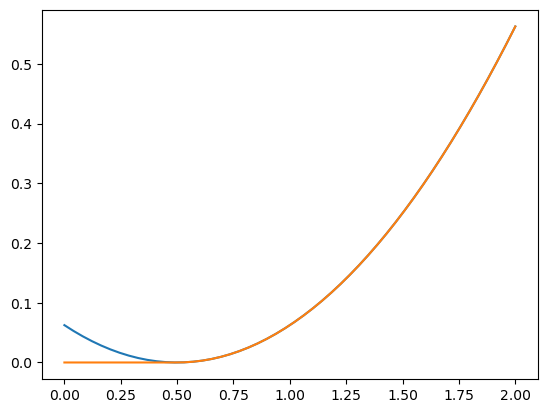

In [103]:
plt.plot(x, y)
plt.plot(x, y2)


In [76]:
ddfunc(0.5, 10, 0.5)

0.0